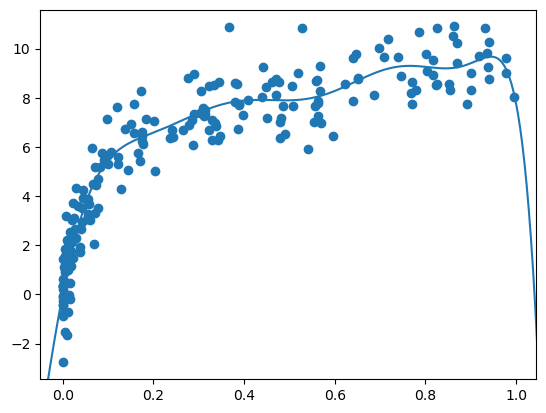

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X2, y2 = make_data(200)

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X2, y2);

model = grid.best_estimator_

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X2.ravel(), y2)
lim = plt.axis()
y_test = model.fit(X2, y2).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

In [4]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 9}